In [13]:
import pandas as pd
from scipy.stats import ttest_rel
import numpy as np
from sklearn.neighbors import KernelDensity

In [2]:
df = pd.read_csv('hogwartsExperiment.csv')

In [3]:
df.head()

,studentID,time,spellsCast,potionStatus
0,1,61.7,11.0,With Potion
1,2,55.7,9.0,With Potion
2,3,60.4,14.0,With Potion
3,4,62.8,14.0,With Potion
4,5,59.9,16.0,With Potion


In [4]:
df['potionStatus'] = df['potionStatus'].map({'With Potion':True, 'Without Potion': False})
df['SPM'] = df['spellsCast']/df['time'] * 60
df.head()

,studentID,time,spellsCast,potionStatus,SPM
0,1,61.7,11.0,True,10.696921
1,2,55.7,9.0,True,9.694794
2,3,60.4,14.0,True,13.907285
3,4,62.8,14.0,True,13.375796
4,5,59.9,16.0,True,16.026711


In [5]:
before = df[~df['potionStatus']]
after = df[df['potionStatus']]

In [6]:
import seaborn as sns

swarm = sns.swarmplot(data=df, x='potionStatus', y='SPM')
swarm.set_xticklabels(['No Potion', 'Potion'])
swarm.set_xlabel('Potion Status')
swarm.set_ylabel('Spells Per Minute')

swarm.set_title('Potion Increases Variation')

swarm.get_figure().savefig('swarm.png')
swarm

In [7]:
df2 = pd.DataFrame()
df2['SPM without']=before['SPM'].reset_index(drop=True)
df2['SPM with']=after['SPM'].reset_index(drop=True)
df2['Time without']=before['time'].reset_index(drop=True)
df2['Time with']=after['time'].reset_index(drop=True)
df2['SPM Difference']=df2['SPM without']-df2['SPM with']
df2.head()

,SPM without,SPM with,Time without,Time with,SPM Difference
0,12.500000,10.696921,57.6,61.7,1.803079
1,11.501597,9.694794,62.6,55.7,1.806804
2,12.361331,13.907285,63.1,60.4,-1.545954
3,10.891089,13.375796,60.6,62.8,-2.484707
4,15.625000,16.026711,57.6,59.9,-0.401711


In [18]:
ttest_rel(df2['SPM without'].values, df2['SPM with'].values)

Ttest_relResult(statistic=-0.04333415453162572, pvalue=0.9655224476519357)

In [8]:
df2.corr()

,SPM without,SPM with,Time without,Time with,SPM Difference
SPM without,1.000000,0.053327,-0.518801,-0.095842,0.455535
SPM with,0.053327,1.000000,-0.050582,-0.301104,-0.864659
Time without,-0.518801,-0.050582,1.000000,-0.095386,-0.215903
Time with,-0.095842,-0.301104,-0.095386,1.000000,0.220214
SPM Difference,0.455535,-0.864659,-0.215903,0.220214,1.000000


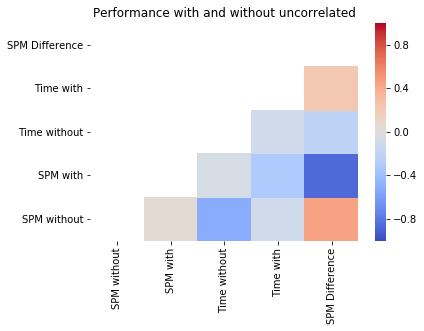

In [9]:
heat = sns.heatmap(df2.corr(),
                    vmin=-1,
                    vmax=1,
                    cmap='coolwarm',
                    mask=np.tril(df2.corr()))

heat.set_ylim(0, 5)
heat.set_xlim(0, 5)
import matplotlib.pyplot as plt
heat.set_title("Performance with and without uncorrelated")
heat.get_figure().savefig('correlations.png')
heat

In [10]:
X = df2[['SPM without']]
X2 = df2[['SPM with']]
noPotionProbs = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
PotionProbs = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X2)

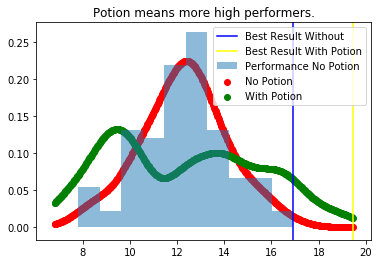

In [11]:
domain = np.linspace(X2.min(), X2.max(), num=500)


fig, ax = plt.subplots()

ax.hist(X.T, density=True, alpha=0.5, label='Performance No Potion');
# ax.hist(X2.T, density=True, alpha=0.5);
ax.scatter(domain, np.exp(noPotionProbs.score_samples(domain)), color='red', label='No Potion')
ax.scatter(domain, np.exp(PotionProbs.score_samples(domain)), color='green', label='With Potion')
ax.axvline(x=X.max()[0], color='blue', label='Best Result Without')
ax.axvline(x=X2.max()[0], color='yellow', label='Best Result With Potion')
ax.title.set_text("Potion means more high performers.")

ax.legend()

fig.savefig('Distribution1.png')

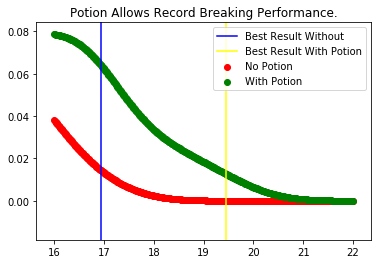

In [12]:
domain2 = np.linspace([16], [22], num=500)


fig, ax = plt.subplots()

ax.scatter(domain2, np.exp(noPotionProbs.score_samples(domain2)), color='red', label='No Potion')
ax.scatter(domain2, np.exp(PotionProbs.score_samples(domain2)), color='green', label='With Potion')
ax.axvline(x=X.max()[0], color='blue', label='Best Result Without')
ax.axvline(x=X2.max()[0], color='yellow', label='Best Result With Potion')
ax.title.set_text("Potion Allows Record Breaking Performance.")
ax.legend()


fig.savefig('Distribution2.png')